## 1. Declaración de Librerías

In [2]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

## 2. Carga del Dataset

En esta sección se realiza la carga y separación del dataset en conjuntos de entrenamiento y prueba en una proporción 90% a 10%, utilizando la función *train_test_split* de la librería *sklearn*. Además, se reserva un 15% del conjunto de entrenamiento como validación durante el proceso de ajuste del modelo.

El dataset contiene un total de 768 instancias caracterizadas por ocho features: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function (DPF) y Age. El label está definido por la columna Outcome, la cual toma un valor de 1 si el paciente padece diabetes y 0 si no la padece. No se implementaron técnicas de limpieza ni llenado de datos, ya que el dataset no contiene datos nulos ni presenta problemas relacionados con tipos de datos que incluyan caracteres. Todos los valores del dataset ya están en un formato adecuado para el análisis, lo que permite trabajar directamente con los datos sin necesidad de realizar ajustes previos De la misma forma, no fue necesario utilizar la técnica de One Hot Encoding, dado que el dataset no contiene variables categóricas. Sin embargo, en el caso de que el target hubiera estado compuesto por valores como “Yes” o “No”, se habría empleado esta técnica para convertir dichos datos en variables binarias, representadas por 0  y 1.


In [3]:
# 1. Cargar el Dataset
dataOccupancy = pd.read_csv("/Users/axelamoshernandezcardenas/Desktop/IAClase/Portafolio2/diabetes.csv")
print(f'El dataset cuenta con : {len(dataOccupancy)} instancias.')

# 2. Se separa las features del label
X = dataOccupancy[[f for f in dataOccupancy.columns if f != 'Outcome']]
y = dataOccupancy['Outcome']
#print(X, y)

# 3. Split de train y test set. test_size = 0.1 --> 10% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Shapes de los sets resultantes
print(X, y)
print("Columnas de X_train:", X_train.columns)
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de x_test:", X_test.shape)
print("Shape de y_test:", y_test.shape)

El dataset cuenta con : 768 instancias.
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50

### 2.1 Código para Realizar Gráficos de:

* Loss vs Epoch
* Accuracy vs Epoch

In [4]:
# Función para generar gráficos con Matplotlib
def plot_acc_loss(training_history):
  plt.plot(training_history.history['accuracy'])
  plt.plot(training_history.history['val_accuracy'])
  plt.title('Accuracy vs. Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()


## 3. Perceptrón

En esta sección se construye un perceptrón utilizando la librería *tensorflow.keras*. Este modelo consta de una sola capa densa con una neurona de salida y activación *sigmoid* para la clasificación binaria.

/Users/axelamoshernandezcardenas/Desktop/IAClase/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ outputlayer (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3649 - loss: 45.6680 - val_accuracy: 0.3457 - val_loss: 51.1984
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3414 - loss: 46.0088 - val_accuracy: 0.3457 - val_loss: 50.4273
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3426 - loss: 44.5008 - val_accuracy: 0.3457 - val_loss: 49.6606
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3363 - loss: 45.3233 - val_accuracy: 0.3457 - val_loss: 48.8934
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3369 - loss: 43.5979 - val_accuracy: 0.3457 - val_loss: 48.1328
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3443 - loss: 42.2550 - val_accuracy: 0.3457 - val_loss: 47.3742
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3565 - loss: 41.0498 - val_accuracy: 0.3457 - val_loss: 46.6159
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3368 - loss: 41.3236 - val_accuracy: 0.3457 - v

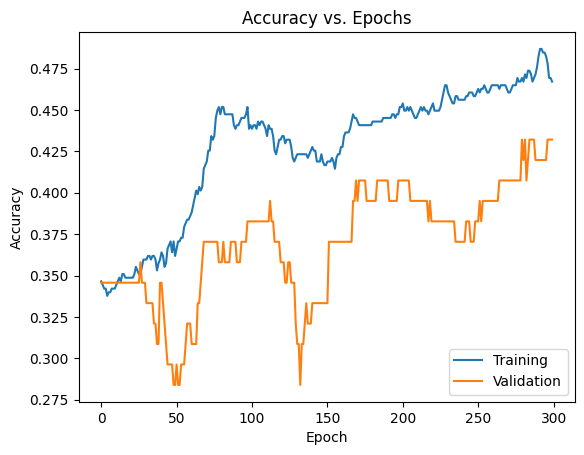

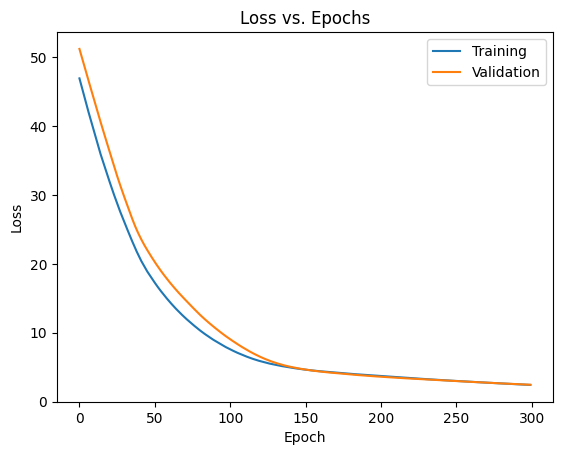

In [5]:
# Función para crear un perceptrón con Tensorflow.keras
def set_nn_model_architecture_perceptron(X_train):
    
    # 1. Definición del tipo de red (secuencial)
    model = Sequential(name='Perceptron')
    
    # 2. Se define la capa de entrada/salida que consta de una sóla neurona con función de activación sigmoid,
    # vector de biases de '1' y pesos iniciales dada una distribución uniforme escalada basada en el número de 
    # neuronas, en este caso, una.
    model.add(Dense(units=1, input_shape=(X_train.shape[1],), activation='sigmoid',
                    kernel_initializer = tf.keras.initializers.HeUniform(seed=0),
                    bias_initializer='ones', name='outputlayer'))
    
    
    model.summary()
    return model

# 3. Creación del perceptrón
perceptron = set_nn_model_architecture_perceptron(X_train)

# 4. Definición del optimizador y learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# 5. Establecer binary_crossentropy por el dataset binario y la métrica de accuracy
perceptron.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 6. Entrenar el perceptrón
training_perceptron = perceptron.fit(X_train, y_train, epochs=300, validation_split=0.15, batch_size=128)

# 7. Se grafica el desempeño de Accuracy vs Epoch y Loss vs Epoch
plot_acc_loss(training_perceptron)

### 3.1 Prueba de la perceptrón con conjunto de prueba

In [6]:
test_loss, test_acc = perceptron.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 2.3381
test_acc: 48.4848 %


## 4. Red Neuronal Secuencial Simple

En esta sección se construye una Red Neuronal Secuencial utilizando la librería TensorFlow y Keras.


/Users/axelamoshernandezcardenas/Desktop/IAClase/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "RedNeuronalSinOptimizar"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hiddenlayer1 (Dense)            │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer3 (Dense)            │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer4 (Dense)            │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer5 (Dense)            │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer6 (Dense)            │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,617 (14.13 KB)

 Trainable params: 3,617 (14.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3980 - loss: 2.0593 - val_accuracy: 0.6420 - val_loss: 0.9329
Epoch 2/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.8964 - val_accuracy: 0.6173 - val_loss: 0.7036
Epoch 3/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5680 - loss: 0.7187 - val_accuracy: 0.6667 - val_loss: 0.6549
Epoch 4/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6057 - loss: 0.6515 - val_accuracy: 0.6667 - val_loss: 0.6374
Epoch 5/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - loss: 0.6135 - val_accuracy: 0.6667 - val_loss: 0.6064
Epoch 6/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6234 - loss: 0.6362 - val_accuracy: 0.6790 - val_loss: 0.5982
Epoch 7/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.6236 - val_accuracy: 0.7160 - val_loss: 0.5998
Epoch 8/800
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.6196 - val_accuracy: 0.6667 - val_loss: 0.6021

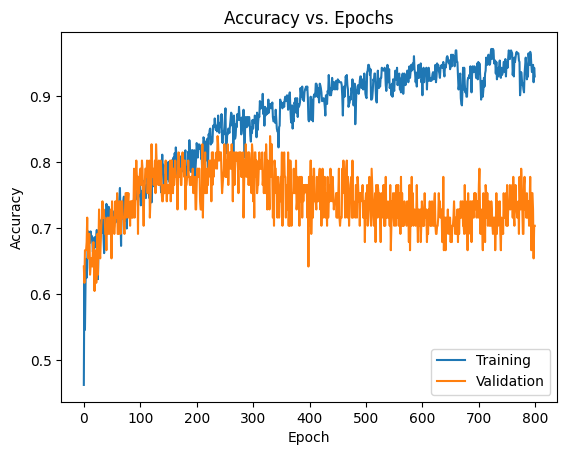

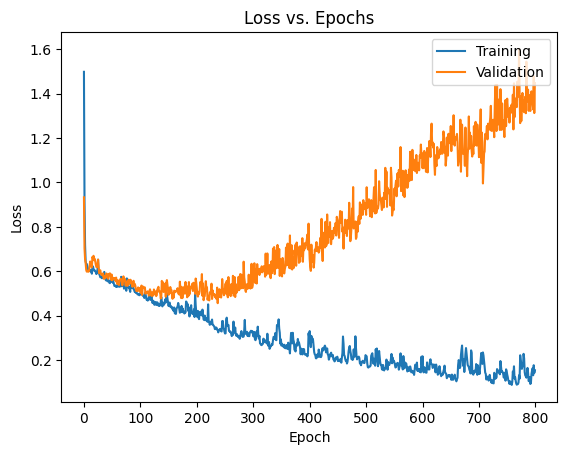

In [7]:
# Función para definir un modelo de Red Neuronal con Tensorflow y Keras
def set_nn_model_architecture_simple(X_train):
    
    # 1. Definición del tipo de NN (Secuencial)
    model = Sequential(name='RedNeuronalSinOptimizar')
    
    # 2. Se define la capa de entrada, pesos iniciales dada una distribución uniforme escalada basada en el número de 
    # neuronas, la función de activación ReLU, vector de biases de 1.
    model.add(Dense(units=16, input_shape=(X_train.shape[1],), activation='relu',
                    kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                    bias_initializer='ones', name='hiddenlayer1')) 
    
    # 3. Capas ocultas con activación relu
    model.add(Dense(units=16, activation='relu', name='hiddenlayer2'))
    model.add(Dense(units=32, activation='relu', name='hiddenlayer3'))
    model.add(Dense(units=32, activation='relu', name='hiddenlayer4'))
    model.add(Dense(units=32, activation='relu', name='hiddenlayer5'))
    model.add(Dense(units=16, activation='relu', name='hiddenlayer6'))
    
    # 4. Capa de salida con una neurona y activación sigmoid (por ser binario)
    model.add(Dense(units=1, activation='sigmoid', name='outputlayer'))
    
    model.summary()
    return model

# 5. Creación de la Red Neuronal
redNeuroSimp = set_nn_model_architecture_simple(X_train)

# 6. Definición del optimizador y learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# 7. Establecer binary_crossentropy por el dataset binario y la métrica de accuracy
redNeuroSimp.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 8. Entrenar la red
trainingRedNeuroSimp = redNeuroSimp.fit(X_train, y_train, epochs=800, validation_split=0.15, batch_size=64)

# 9. Se grafica el desempeño de Accuracy vs Epoch y Loss vs Epoch
plot_acc_loss(trainingRedNeuroSimp)

### 4.1 Prueba de la red neuronal con conjunto de prueba

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = redNeuroSimp.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 1.8029
test_acc: 69.2641 %


## 5. Red Neuronal Secuencial Optimizada

En esta sección se construye una Red Neuronal Secuencial Optimizada utilizando la librería TensorFlow y Keras, adicionando técnicas de regularización y callbacks.

/Users/axelamoshernandezcardenas/Desktop/IAClase/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "RedNeuronalOptimizada"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hiddenlayer1 (Dense)            │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer2 (Dense)            │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer3 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer4 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer5 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization1            │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer6 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer7 (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization2            │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenlayer8 (Dense)            │ (None, 28)             │           476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,209 (8.63 KB)

 Trainable params: 2,145 (8.38 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4635 - loss: 0.7561 - val_accuracy: 0.3580 - val_loss: 0.8394 - learning_rate: 0.0010
Epoch 2/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5988 - loss: 0.6750 - val_accuracy: 0.3827 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 3/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6456 - loss: 0.6694 - val_accuracy: 0.3951 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 4/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6602 - loss: 0.6714 - val_accuracy: 0.4074 - val_loss: 0.7005 - learning_rate: 0.0010
Epoch 5/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6190 - loss: 0.6707 - val_accuracy: 0.4444 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 6/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6412 - loss: 0.6410 - val_accuracy: 0.4568 - val_loss: 0.6763 - learning_rate: 0.0010
Epoch 7/1200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6538 - loss: 0.6386 - val_accuracy:

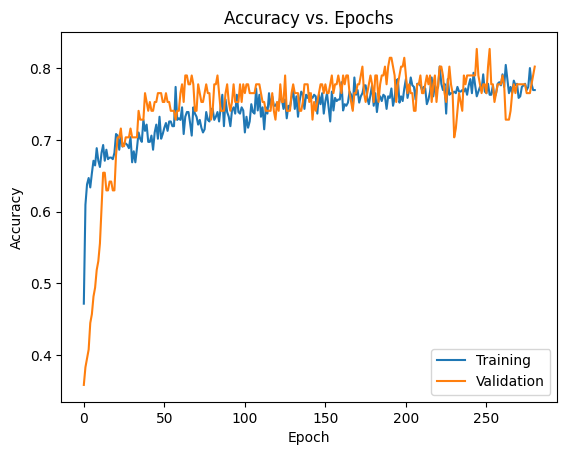

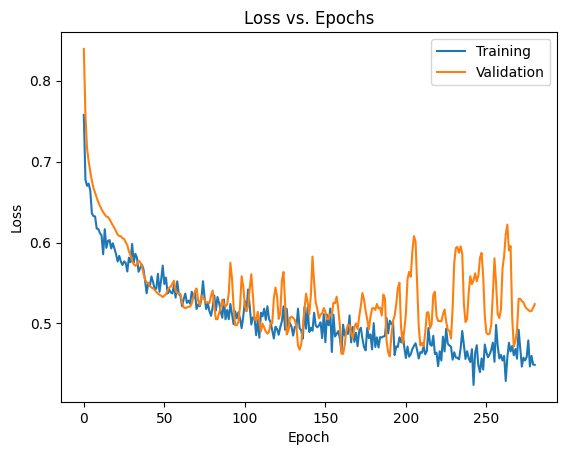

In [12]:
# Funcion para definir un modelo de Red Neuronal utilizando Técnicas de Regularización y Callbacks
def set_nn_model_architecture_optimized(X_train):

    # 1. Definición del tipo de NN (Secuencial)
    model = Sequential(name='RedNeuronalOptimizada')
    
    # 2. Se define la capa de entrada, pesos iniciales dada una distribución uniforme escalada basada en el número de 
    # neuronas, la función de activación ReLU, vector de biases de 1.
    model.add(Dense(units=8, input_shape=(X_train.shape[1],), activation='relu',
                    kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                    bias_initializer='ones',
                    name='hiddenlayer1')) 
    
    # 3. Segunda capa oculta con Dropout reducido
    model.add(Dense(units=16, activation='relu', name='hiddenlayer2'))
    model.add(Dense(units=16, activation='relu', name='hiddenlayer3'))
    model.add(Dropout(rate=0.1, name='dropout1'))  # Primera capa de Dropout
    model.add(Dense(units=16, activation='relu',  name='hiddenlayer4'))
    model.add(Dense(units=16, activation='relu',  name='hiddenlayer5'))
    model.add(BatchNormalization(name='batch_normalization1')) # Aplicación de Batch Normalization
    model.add(Dense(units=16, activation='relu',  name='hiddenlayer6'))
    model.add(Dense(units=16, activation='relu',  name='hiddenlayer7'))
    model.add(BatchNormalization(name='batch_normalization2')) # Aplicación de un segundo Batch Normalization
    model.add(Dropout(rate=0.3, name='dropout2'))  # Segunda capa de Dropout reducido
    model.add(Dense(units=28, activation='relu', name='hiddenlayer8'))
    
    # 4. Capa de salida con activación sigmoid para clasificación binaria
    model.add(Dense(units=1, activation='sigmoid', name='outputlayer'))
    
    model.summary()
    return model

# 5. Creación de la Red Neuronal Optimizada
redNeuroOpt = set_nn_model_architecture_optimized(X_train)

# 6. Definición de Callback: Early Stopping - Si el rendimiento no mejora en 90 epochs, parar.
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 90, mode =  "min")

# 7. Definición de Callback: Learning Rate Reduction - Ajusta dinámicamente el learning rate cuando una métrica no ha mejorado en 160 epochs.
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience =80, factor = 0.1)

# 8. Definición del optimizador y learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

# 9. Establecer binary_crossentropy por el dataset binario y la métrica de accuracy
redNeuroOpt.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 10. Entrenar la red
training_history_3 = redNeuroOpt.fit(X_train, y_train, epochs=1200, validation_split=0.15, batch_size=114,
                                 callbacks=[early_stopping, lr_reduction], verbose=1)

# 9. Se grafica el desempeño de Accuracy vs Epoch y Loss vs Epoch
plot_acc_loss(training_history_3)

### 5.1 Prueba de la red neuronal optimizada con conjunto de prueba

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = redNeuroOpt.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))


test_loss: 0.6599
test_acc: 70.5628 %


## 6. Predicciones

In [14]:
prediccionesRedOpt = redNeuroOpt.predict(X_test)

prediccionesBinarias = (prediccionesRedOpt > 0.5).astype(int)

for i, (prediction, actual) in enumerate(zip(prediccionesBinarias[:10], y_test[:10])):
    print(f"y_test {i+1}: {prediction[0]} (ytrain: {actual})", end="\n")

print("Fin")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
y_test 1: 0 (ytrain: 0)
y_test 2: 0 (ytrain: 0)
y_test 3: 0 (ytrain: 0)
y_test 4: 0 (ytrain: 0)
y_test 5: 0 (ytrain: 0)
y_test 6: 0 (ytrain: 0)
y_test 7: 0 (ytrain: 0)
y_test 8: 0 (ytrain: 0)
y_test 9: 0 (ytrain: 0)
y_test 10: 1 (ytrain: 0)
Fin


## 7. Referencias

UCI Machine Learning. (2016). Pima Indians Diabetes Database. Kaggle. Retrieved September 4, 2024, from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database 


## 8. Reporte

0. IMPORTANTE

El ipynb se utilizó varias veces para el Portafolio de Análisis. El reporte actual utiliza los valores obtenidos para ese portafolio, pero añade los diferentes ajustes probados a lo largo de la realización del mismo. - Axel

1. Introducción

El dataset contiene un total de 768 instancias caracterizadas por ocho features: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function (DPF) y Age. El label está definido por la columna Outcome, la cual toma un valor de 1 si el paciente padece diabetes y 0 si no la padece. Para construir el modelo, es necesario separar las features del target para que la red neuronal aprenda a predecir Outcome a partir de las otras 8 variables. Por lo anterior, se decidió dividir el dataset en dos partes: el conjunto de entrenamiento (train set) y el conjunto de prueba (test set).

El conjunto de entrenamiento corresponde al 70% de los datos y se utiliza para entrenar el modelo, permitiendo que los pesos se ajusten de tal manera que nos permita predecir el target correctamente. Por otra parte, el conjunto de prueba corresponde al 30% (test_size = 0.3) de los datos y se utiliza para evaluar el rendimiento final del modelo en datos no vistos durante el proceso de entrenamiento, lo cual es importante para verificar que el modelo generaliza bien en datos nuevos. Para realizar lo anterior, se utilizó la función de train_test_split, de la librería de sklearn, que realiza una división aleatoria, manteniendo la distribución de los datos como se mencionó anteriormente.

Además de los conjuntos mencionados, durante el proceso de entrenamiento también se utilizará un subconjunto del conjunto de entrenamiento del 15% para un conjunto de validación. Esto proporcionará una estimación temprana de la capacidad de generalización del modelo y ayudará a detectar varianza alta (overfitting) antes de probarlo con el conjunto de prueba. Para esto, se utilizó el parámetro validation_split = 0.15 de la librería Keras.

2 Parámetros e Hiperparámetros

2.1 Learning Rate

El learning rate fue un hiperparámetro muy constante en cuanto a los valores probados. En general, para cada uno de los modelos se probó el arreglo de valores para el learning rate de [0.1, 0.01, 0.001, 0.0001] junto al un optimizador Adam sobre el SGD debido a que mostró un mejor rendimiento en pruebas anteriores.

* Perceptrón: Para este modelo, los valores de learning rate alto resultaban en una pérdida mayor y una precisión menor. Valores muy altos tampoco fueron suficientes, ya que aunque el loss si disminuía no lo hacía de una gran forma. Por lo tanto, el valor de 0.01 fue el valor óptimo de learning rate para el perceptrón, ya que logró minimizar de una mejor forma el error y mejorar la precisión.

* Red Neuronal: Para la red neuronal un learning rate muy elevado suponía un ajuste de pesos y bias muy bajo, debido a que los métricos calculados simplemente no aumentaban lo suficiente. Lo mismo sucedió con un learning rate demasiado bajo, aunque en este si se logró aumentar la precisión, debía de suceder un gran numero de epochs para ver una mejora considerable. Finalmente, learning rates normales mejoraron sólamente el conjunto de entrenamiento. Por lo anterior, se eligió el valor de 0.01 como valor de de learning rate para esta red neuronal.

* Red Neuronal Optimizada: Al ser configuraciones diferentes, este modelo logró utilizar de una mejor manera los valores de learning rate para calcular las métricas. Sin embargo, el patrón continuó, ya que un valor muy alto o muy bajo, estabilizaban la precisión del modelo alrededor del 75% para los conjuntos y los valores más normales para el parámetro lograron que el modelo pudiera superar la barrera del 80% para el conjunto de validación. Por lo anterior, se decidió utilizar el valor de 0.01 para el learning rate.

2.2 Epochs

Los epochs que se probaron fueron múltiplos de 100 hasta llegar a los 1,500. Las observaciones son las siguientes:


* Perceptrón: Para este modelo, el número de epochs afectó en gran medida los métricos que calculaban. Un gran número de epochs (600+) ajustaba demasiado al modelo a tal punto que podría considerarse overfitting. Por otra parte, un menor número de epochs hacía que el perceptrón cayera en underfitting. Por lo tanto, se decidió usar un valor de 300 epochs para entrenar al perceptrón, valor que daría un buen ajuste.

* Red Neuronal: Este modelo  depende de la naturaleza del dataset definir que tantos epochs se deben incluir. Un numero muy bajo de epochs no entrenaría correctamente al modelo y un número muy alto lo llevaría a estancarse cuando las métricas no puedan mejorar. Por lo anteior, y por ser un modelo mas complejo que el perceptrón, se decidió utilizar un valor de 800 epochs para entrenar al modelo.

* Red Neuronal Optimizada: Para este modelo, el número de epochs generalmente no superó los 300 debido a la implementación de callbacks que detenían el entrenamiento en el momento de que cierta métrica no presentara mejora. Por lo anterior, se decidió utilizar un valor mayor a 300 con el fin de que los callbacks pudieran cumplir su funcionalidad.


2.3 Batch Size

El batch size controla el número de muestras usadas en un epoch. Se consideró que un valor bajo podría introducir ruido en el entrenamiento, mientras que uno muy alto podría ralentizar el proceso del mismo al tener que procesar demasiadas muestras a la vez. Por lo anterior, se utilizaron los siguientes valores para este parámetro:

* Perceptrón: 128, al ser una sola neurona el entrenamiento sería lento si se agregara un valor más alto, pero es necesario un valor como el establecido para un buen entrenamiento.
* 
* Red Neuronal: 64, al ser más complejo que el modelo anterior, un batch size menor debe ser utilizado para rapidez en el entrenamiento y verificar que la red y todas sus neuronas calculen correctamente la pérdida.
  
* Red Neuronal Optimizada: 114, ya que al agregar técnicas de regularización, como el Dropout, el modelo perdería momentaneamente partes de sus neuronas, por lo que un valor alto para este parámetro es necesario para un correcto entrenamiento.

2.4 Capas y neuronas
 
Para una red neuronal entre más capas ocultas y neuronas se tenga, mayor complejidad se obtiene. Esto es improtante ya que puede llevarnos al overfitting. Por lo anteior, las configuraciones de capas y numero de neuronas fue de la siguiente manera:

* Red Neuronal: Consta de 7 capas (5 ocultas) con una distribución de neuronas de 16, 16, 32, 32, 32, 16, 1. Al no tener optimizaciones, esto puede volver muy complejo al modelo a la hora del entrenamiento, especialmente por el gran numero de capas y neuronas.
  
* Red Neuronal Optimizada: Consta de 9 capas (7 ocultas) con una distribución de neuronas de 8, 16, 16, 16, 16, 16, 16, 28, 1. Al tener optimizaciones, la complejidad del modelo es adecuada y el número de neuronas está ajustado para evitar overfitting a la hora de entrenarlo.

2.5 Funciones de Activación

La librería keras ofrece más de 15 funciones de activación, como softmax, leakyReLU o tanh. Para las redes neuronales se decidió utilizar las funciones de activación de la siguiente manera: 

* Entrada: ReLu, debido a su uso común y su eficacia para combatir el problema del ‘vanishing gradient’ (gradientes muy pequeños que resultan en actualizaciones de pesos mínimos en las neuronas) en redes neuronales que utilizan backpropagation. 

* Ocultas: ReLu por las mismas razones enlistadas en el punto anterior.

* Salida: Sigmoid, ya que devuelve un valor entre 0 y 1, en un threshold de [-5, 5] para realizar una decisión binaria.

2.6 Dropout

El dropout consiste en excluir temporalmente algunas neuronas modificando la estructura de la red neuronal y, por ende, reduciendo su complejidad. Lo anterior ayuda a evitar que el modelo se ajuste a los datos de entrenamiento. Para la red optimizada, se utilizaron dos capas de dropout (después de las capas 3 y 7), con valores de [0.1, 0.3] con el fin de no perder en el entrenamiento demasiadas neuronas.

2.7 Patience

Finalmente, para la red optimizada, los callbacks utilizan el parámetro de patience para parar el entrenamiento cuando un determinado número de epochs ha pasado y los métricos no han mejorado. Un valor alto en estos parámetros no funcionaría de manera correcta para este dataset debido a su corta longitud. Por lo anterior, los valores de patience fueron los siguientes:

* Learning Rate Reduction: 80, se observo que dejar pasar un mayor numero de epochs para este dataset mejoraba el rendimiento, por lo que para evitar un entrenamiento más lento y precisio, el valor se fijó en 80.
* Early Stopping: 90, aunque generalmente el modelo no paró por este callback, mantener un valor más elevado que el de Learning Rate Reduction nos permite corroborar que aun y cuando puede no suceder, el learning rate pueda disminuir en dado caso que el primer callback lo vea necesario y aun así tener tiempo de verificar si los métricos cambiaron.

3 Métricos y Resultados

Una vez finalizado el entrenamiento, los métricos y resultados fueron los siguientes:

3.1 Perceptrón

* El accuracy en el conjunto de entrenamiento aumentó desde 35.21% hasta 46.56%. Por otra parte, el accuracy en el conjunto de validación fue de 34.57% hasta un máximo de 43.21%. Para el conjunto de prueba, la precisión fue de 48.91%

* El loss en el entrenamiento comenzó en un valor de 46.93 y disminuyó constantemente hasta valores aproximados a 2.39. Por otra parte, el loss de validación también disminuye hasta 2.45, pero sigue siendo más alto que el de entrenamiento. Para el conjunto de prueba, el loss fue de 1.40.

* Este modelo sufrió de un alto bias debido a su simplicidad, lo que lo lleva a caer en underfitting. Esto se evidencia por su pobre desempeño tanto en los conjuntos de entrenamiento como de validación y prueba. Además, no existe una varianza alta, ya que el modelo tampoco presenta una alta precisión en el conjunto de entrenamiento.

3.2 Red Neuronal

* El accuracy en el conjunto de entrenamiento aumentó desde 37.32% hasta 92.04%. Por otra parte, el accuracy en el conjunto de validación se mantuvo en la mayor parte del entrenamiento alrededor del 65.40% hasta un máximo de 66.67%. Para el conjunto de prueba, la precisión fue de 69.69%.

* El loss en el entrenamiento comenzó en un valor de 4.35 y disminuyó hasta valores cercanos a 0.19. Por otra parte, el loss de validación también disminuye hasta 0.58, pero después sube a 1.41. Para el conjunto de prueba, el loss fue de 1.40.

* Este modelo sufrió de overfitting, es decir, varianza alta debido a la alta diferencia de rendimeintos entre los datasets. Se puede observar como el único set que desempeñó correctamente fue el de entrenamiento. A comparación con el set de prueba que fue un 23% menos preciso. Por lo tanto, este modelo logró un buen ajuste sólamente para los datos de entrenamiento.

3.3 Red Neuronal Optimizada
 
* El accuracy en el conjunto de entrenamiento aumentó desde 44.47% a 74.71%. Por otra parte, el accuracy en el conjunto de validación se logró una máxima precisión final de 77.78%. Para el conjunto de prueba, la precisión fue de 74.02%.

* El loss en el entrenamiento comenzó en un valor de 0.85 y disminuyó rápidamente hasta 0.50. Por otra parte, el loss de validación también disminuye de 1.38 a 0.48 a lo largo de los epochs. Para el conjunto de prueba, el loss fue de 0.57.

* Este modelo obtuvo un desempeño aceptable en los tres datasets. Los métricos indican que el modelo generaliza bien para nuevos valores la mayoría de las veces. Por lo anterior, el ajuste del modelo es balanceado aun y cuando la precisión y el loss cuentan con margen de mejora.

4 Conclusiones
   
| Modelo                  | Precisión Final (%) | Loss Final | Fit        |
|-------------------------|---------------------|------------|------------|
| Perceptrón               | 48.91               | 2.33       | Underfitted|
| Red Neuronal             | 69.69               | 1.40       | Overfitted |
| Red Neuronal Optimizada  | 74.06               | 0.57       | Balanceado |

En conclusión, el modelo optimizado demostró una capacidad de generalización superior en comparación con los modelos más simples y sin optimizaciones, que sufrieron de underfitting y overfitting. Lo anterior es gracias a las técnicas de regularización y los ajustes aplicados a la red neuronal, los cuales permitieron un mejor desempeño al predecir nuevos datos.

Sin embargo, es importante destacar que los modelos aún puede mejorarse y que es muy sencillo de elegir uno sobre otro una vez que modifiquemos los parámetros e hiperparametros y validemos que su capacidad de predicción es correcta.

5 Anexo de Predicciones de Modelo Optimizado

== RED NEURONAL OPTIMIZADA ==

y_test 1: 0 (ytrain: 0)
y_test 2: 0 (ytrain: 0)
y_test 3: 0 (ytrain: 0)
y_test 4: 0 (ytrain: 0)
y_test 5: 0 (ytrain: 0)
y_test 6: 1 (ytrain: 0)
y_test 7: 0 (ytrain: 0)
y_test 8: 0 (ytrain: 0)
y_test 9: 1 (ytrain: 0)
y_test 10: 0 (ytrain: 0)
Fin





